# Úkol

Vytvořte konvoluční neuronovou síť, která bude zpracovávat MNIST dataset.

Porovnejte ji s neuronovou sítí s plně propojeným vrstvami.

In [5]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Načtení a zobrazení dat

In [7]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [8]:
# Hodnoty jsou odstíny šedi 0 - 255
# 0 je cerna, 255 je bila
img = X_train[0]
print (f"min:{np.amin(X_train[0])} max:{np.amax(X_train[0])}")

min:0 max:255


In [9]:
# funkce pro zobrazení n prvních čísel včetně jejich popisků
def show_images (images, labels, rows=6, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for idx in range (0, rows * cols):
        ridx=idx // cols
        cidx=idx % cols
        ax= axes[ridx, cidx]
        ax.axis("off")
        ax.imshow(images[idx], cmap="gray_r")
        ax.set_title(f"{labels[idx]}")
    plt.show()    

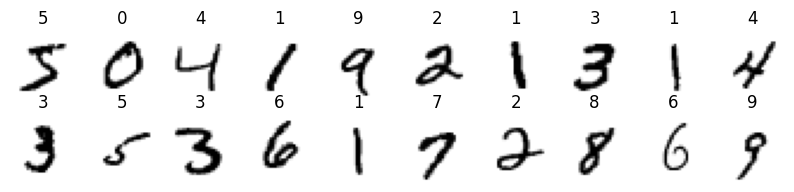

In [10]:
show_images(X_train, Y_train, 2, 10)

C:\Users\kobrl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\datasets\_openml.py:75: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


Trénovací data: (60000, 784)
Testovací data: (10000, 784)
min: 0 max: 255


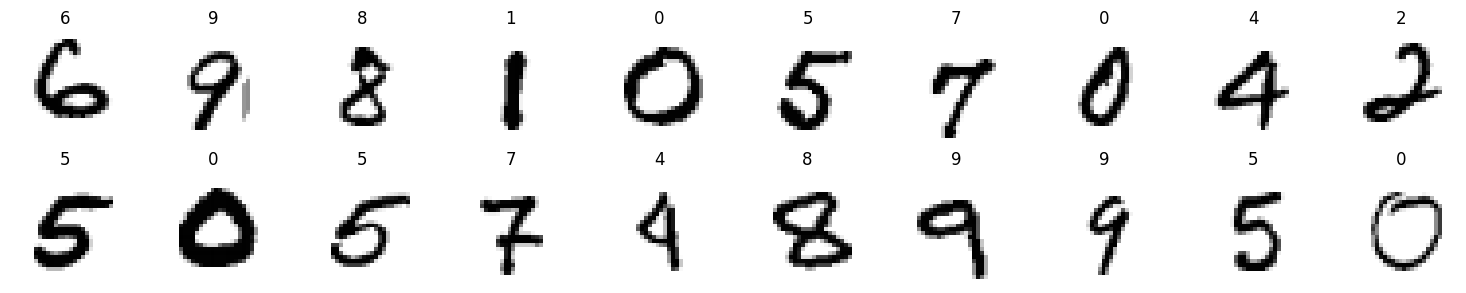

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Načtení MNIST datasetu přes sklearn
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

# Rozdělení na trénovací a testovací data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Zobrazení statistiky
print(f"Trénovací data: {X_train.shape}")
print(f"Testovací data: {X_test.shape}")
print(f"min: {np.amin(X_train[0])} max: {np.amax(X_train[0])}")

# Funkce pro zobrazení obrázků
def show_images(images, labels, rows=2, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*1.5, rows*1.5))
    for idx in range(rows * cols):
        ridx = idx // cols
        cidx = idx % cols
        ax = axes[ridx, cidx]
        ax.axis('off')
        ax.imshow(images[idx].reshape(28, 28), cmap='gray_r')
        ax.set_title(f"{labels[idx]}")
    plt.tight_layout()
    plt.show()

# Zobrazení vzorových obrázků
show_images(X_train, y_train, 2, 10)


# 2. Příprava dat

Standardizace hodnot z rozsahu 0 - 255 na rozsah 0 - 1

In [12]:
# Vstupem do neuronové sítě je vektor. 
# Změníme tvar pole jedné číslice z 28x28 na 784x1
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [13]:
# pro neuronovou síť potřebujeme upravit i výsledky pomocí binárního encodování
# tentokát použijeme vestavěnou funkci ve frameworku keras
from keras.utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# 3. Neuronová síť

In [14]:
import keras
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

In [15]:
# Vytvoření a naučení modelu

In [18]:
# 1. Načtení a příprava dat
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Načtení MNIST datasetu
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.to_numpy(), mnist.target.astype(int).to_numpy()

# Správné rozdělení na trénovací a testovací sadu
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=10000, random_state=42, stratify=y_temp)

# Standardizace
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 2. Definice proměnných pro MLP
X_train_mlp = X_train  # (42000, 784)
X_val_mlp = X_val      # (10000, 784)
X_test_mlp = X_test    # (10000, 784)

# 3. Definice a trénování modelu
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=50,
    random_state=42
)

# Správné volání fit() s odpovídajícími daty
mlp_model.fit(X_train_mlp, y_train)


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50, random_state=42)

In [20]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

# 1. Načtení a příprava dat
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# 2. Předzpracování dat pro CNN
# Normalizace a reshape
X_train_cnn = X_train_full.reshape((-1, 28, 28, 1)).astype('float32') / 255
X_test_cnn = X_test.reshape((-1, 28, 28, 1)).astype('float32') / 255

# Rozdělení na trénovací a validační sadu
X_train_cnn, X_val_cnn = X_train_cnn[:50000], X_train_cnn[50000:]
y_train_cat = to_categorical(y_train_full[:50000])
y_val_cat = to_categorical(y_train_full[50000:])

# 3. Definice a kompilace modelu
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# 4. Trénování modelu
import time
start_time = time.time()
history = cnn_model.fit(X_train_cnn, y_train_cat,
                       epochs=10,
                       batch_size=128,
                       validation_data=(X_val_cnn, y_val_cat))
print(f"Čas trénování: {time.time() - start_time:.2f}s")

# 5. Uložení modelu
cnn_model.save('mnist_cnn_model.h5')


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8323 - loss: 0.5572 - val_accuracy: 0.9773 - val_loss: 0.0825
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9744 - loss: 0.0816 - val_accuracy: 0.9848 - val_loss: 0.0508
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9845 - loss: 0.0514 - val_accuracy: 0.9871 - val_loss: 0.0401
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9885 - loss: 0.0388 - val_accuracy: 0.9895 - val_loss: 0.0371
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9907 - loss: 0.0316 - val_accuracy: 0.9881 - val_loss: 0.0387
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9910 - loss: 0.0278 - val_accuracy: 0.9902 - val_loss: 0.0356
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9913 - val_loss: 0.0346
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accu

Čas trénování: 52.48s


# 4. Historie učení modelu
- Zobrazte učební křivku
- Zobrazte křivku přesnosti modelu
- Popište tvary

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9914 - val_loss: 0.0344
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9919 - val_loss: 0.0355
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9951 - loss: 0.0119 - val_accuracy: 0.9910 - val_loss: 0.0407
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9925 - val_loss: 0.0352
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9971 - loss: 0.0079 - val_accuracy: 0.9923 - val_loss: 0.0351
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9909 - val_loss: 0.0376
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9979 - loss: 0.0070 - val_accuracy: 0.9915 - val_loss: 0.0468
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9975 - loss: 0.0066 - val_accu

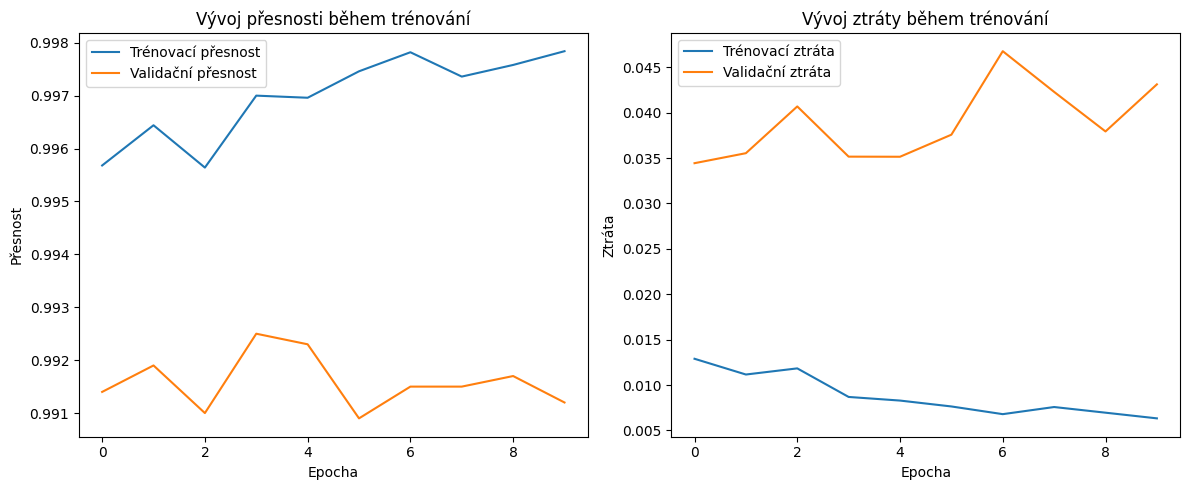

In [24]:
# Nejprve musíme model natrénovat a získat historii
import time
from keras.callbacks import History

# Vytvoření objektu pro sledování historie
history = History()

# Spuštění trénování s explicitním předáním callbacku
start_time = time.time()
cnn_history = cnn_model.fit(
    X_train_cnn, 
    y_train_cat,
    validation_data=(X_val_cnn, y_val_cat),  # Použijte validační data
    epochs=10,
    batch_size=128,
    callbacks=[history],  # Přiřazení callbacku
    verbose=1
)
cnn_train_time = time.time() - start_time

# Nyní můžeme bezpečně vizualizovat
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Křivka přesnosti
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Trénovací přesnost')
plt.plot(cnn_history.history['val_accuracy'], label='Validační přesnost')
plt.title('Vývoj přesnosti během trénování')
plt.ylabel('Přesnost')
plt.xlabel('Epocha')
plt.legend()

# Křivka ztráty
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Trénovací ztráta')
plt.plot(cnn_history.history['val_loss'], label='Validační ztráta')
plt.title('Vývoj ztráty během trénování')
plt.ylabel('Ztráta')
plt.xlabel('Epocha')
plt.legend()

plt.tight_layout()
plt.show()


# 5. Ověření modelu
- R2 skóre
- Přesnost modelu jako celku
- Přesnost přes třídy
- Matice změn
- Příklady špatné klasifikace

MLP - Čas inference: 0.0685 s
MLP - Přesnost: 0.1027
MLP - R2 skóre: -0.9630
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
CNN - Čas inference: 0.6700 s
CNN - Přesnost: 0.9933
CNN - R2 skóre: 0.9864


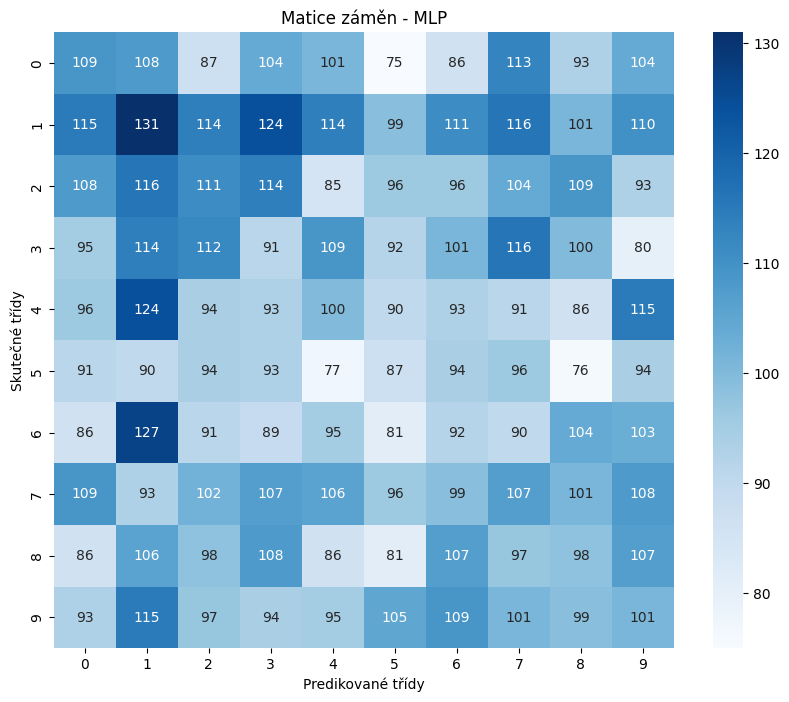

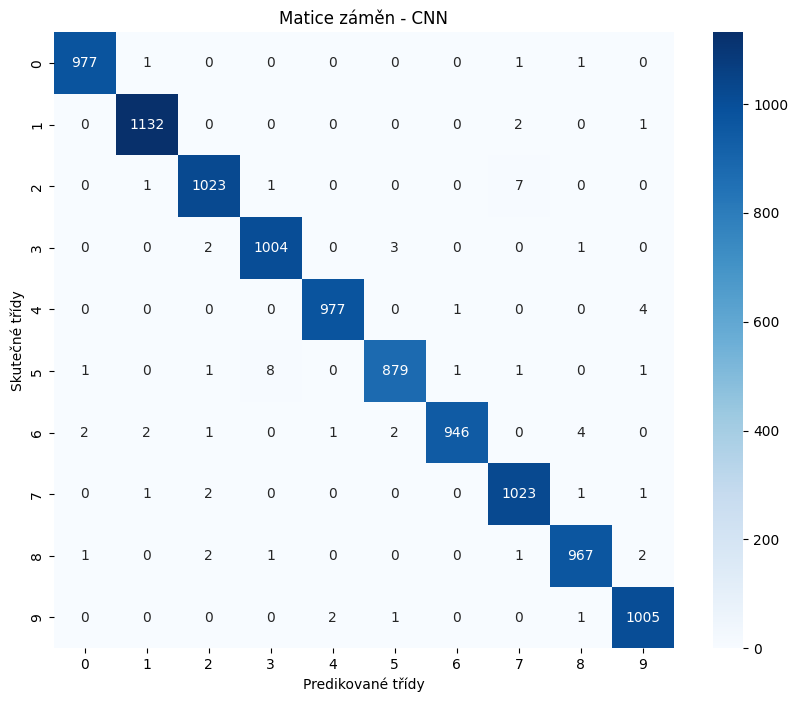

In [25]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

# Vyhodnocení MLP modelu
start_time = time.time()
y_pred_mlp = mlp_model.predict(X_test_mlp)
mlp_inference_time = time.time() - start_time

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_r2 = r2_score(y_test, y_pred_mlp)

print(f"MLP - Čas inference: {mlp_inference_time:.4f} s")
print(f"MLP - Přesnost: {mlp_accuracy:.4f}")
print(f"MLP - R2 skóre: {mlp_r2:.4f}")

# Vyhodnocení CNN modelu
start_time = time.time()
y_pred_cnn_prob = cnn_model.predict(X_test_cnn)
cnn_inference_time = time.time() - start_time

y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)
cnn_r2 = r2_score(y_test, y_pred_cnn)

print(f"CNN - Čas inference: {cnn_inference_time:.4f} s")
print(f"CNN - Přesnost: {cnn_accuracy:.4f}")
print(f"CNN - R2 skóre: {cnn_r2:.4f}")

# Matice záměn pro MLP
plt.figure(figsize=(10, 8))
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Matice záměn - MLP')
plt.xlabel('Predikované třídy')
plt.ylabel('Skutečné třídy')
plt.show()

# Matice záměn pro CNN
plt.figure(figsize=(10, 8))
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Matice záměn - CNN')
plt.xlabel('Predikované třídy')
plt.ylabel('Skutečné třídy')
plt.show()


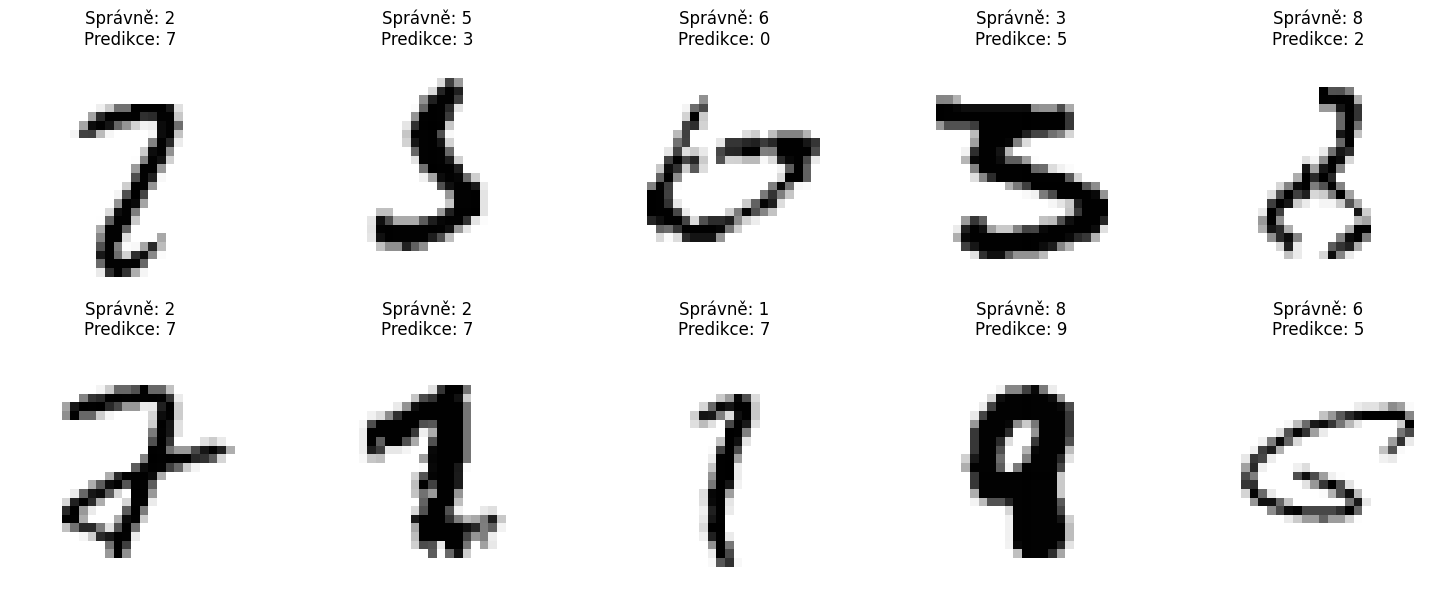

In [26]:
# Nalezení špatně klasifikovaných příkladů pro CNN
misclassified_idx = np.where(y_pred_cnn != y_test)[0]

# Zobrazení prvních 10 špatně klasifikovaných příkladů
if len(misclassified_idx) > 0:
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(misclassified_idx[:10]):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')
        plt.title(f"Správně: {y_test[idx]}\nPredikce: {y_pred_cnn[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# 6. Porovnání modelu
- Který model je přesnější
- Jak je to s délkou učení
- Jak je to s délkou inference

In [29]:
# MLP model
import time
from sklearn.neural_network import MLPClassifier

# Trénování MLP
mlp_start = time.time()
mlp_model = MLPClassifier(hidden_layer_sizes=(128,64), activation='relu', max_iter=50)
mlp_model.fit(X_train_mlp, y_train)
mlp_train_time = time.time() - mlp_start

# Inference MLP
mlp_inf_start = time.time()
y_pred_mlp = mlp_model.predict(X_test_mlp)
mlp_inference_time = time.time() - mlp_inf_start

# CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Trénování CNN
cnn_start = time.time()
cnn_model.fit(X_train_cnn, y_train_cat, epochs=10, validation_data=(X_val_cnn, y_val_cat))
cnn_train_time = time.time() - cnn_start

# Inference CNN
cnn_inf_start = time.time()
y_pred_cnn = cnn_model.predict(X_test_cnn)
cnn_inference_time = time.time() - cnn_inf_start

# Porovnání
print(f"""
=== Porovnání modelů ===
Přesnost:
- MLP: {accuracy_score(y_test, y_pred_mlp):.4f}
- CNN: {accuracy_score(y_test, np.argmax(y_pred_cnn, axis=1)):.4f}

Časy trénování:
- MLP: {mlp_train_time:.2f}s
- CNN: {cnn_train_time:.2f}s

Časy inference:
- MLP: {mlp_inference_time:.4f}s
- CNN: {cnn_inference_time:.4f}s
""")


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9893 - val_loss: 0.0470
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9959 - loss: 0.0115 - val_accuracy: 0.9905 - val_loss: 0.0417
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9964 - loss: 0.0093 - val_accuracy: 0.9906 - val_loss: 0.0411
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9915 - val_loss: 0.0494
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9974 - loss: 0.0075 - val_accuracy: 0.9901 - val_loss: 0.0546
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9904 - val_loss: 0.0443
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9917 - val_loss: 0.0473
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9972 - loss: 0.0093 - 